# Preparation

## Import Library

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.cm as cm

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

#Data Cleaning

In [ ]:
ISPU_2021 = "/content/global air pollution dataset.csv"
ISPU_2021 = pd.read_csv(ISPU_2021, delimiter=',')
ISPU_2021.head ()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [ ]:
df_cleaned = ISPU_2021.astype(str) 
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23463 non-null  object
 1   City                23463 non-null  object
 2   AQI Value           23463 non-null  object
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  object
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  object
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  object
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  object
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: object(12)
memory usage: 2.1+ MB


In [ ]:
df_cleaned = df_cleaned.drop(columns=['Country', 'City', 'AQI Value',
                                      'CO AQI Category','Ozone AQI Category',
                                      'NO2 AQI Category','PM2.5 AQI Category'])
df_cleaned # Menghapus Kolom Yang ga kepake

,AQI Category,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
0,Moderate,1,36,0,51
1,Good,1,5,1,41
2,Moderate,1,39,2,66
3,Good,1,34,0,20
4,Good,0,22,0,6
...,...,...,...,...,...
23458,Unhealthy,3,154,2,184
23459,Good,1,20,5,50
23460,Good,1,22,1,50
23461,Moderate,1,44,2,71


In [ ]:
#Parsing int64
df_cleaned = df_cleaned.astype({'CO AQI Value': int, 'Ozone AQI Value': int, 
                                'NO2 AQI Value': int, 'PM2.5 AQI Value': int})

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   AQI Category     23463 non-null  object
 1   CO AQI Value     23463 non-null  int64 
 2   Ozone AQI Value  23463 non-null  int64 
 3   NO2 AQI Value    23463 non-null  int64 
 4   PM2.5 AQI Value  23463 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 916.6+ KB


In [ ]:
df_cleaned = df_cleaned.replace('Good', 5)
df_cleaned = df_cleaned.replace('Moderate', 4)
df_cleaned = df_cleaned.replace('Unhealthy for Sensitive Groups', 3)
df_cleaned = df_cleaned.replace('Unhealthy', 2)
df_cleaned = df_cleaned.replace('Very Unhealthy', 1)
df_cleaned = df_cleaned.replace('Hazardous', 0)


df_cleaned

,AQI Category,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
0,4,1,36,0,51
1,5,1,5,1,41
2,4,1,39,2,66
3,5,1,34,0,20
4,5,0,22,0,6
...,...,...,...,...,...
23458,2,3,154,2,184
23459,5,1,20,5,50
23460,5,1,22,1,50
23461,4,1,44,2,71


In [ ]:
ISPU_2021_Cleaned = df_cleaned
ISPU_2021_Cleaned

,AQI Category,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
0,4,1,36,0,51
1,5,1,5,1,41
2,4,1,39,2,66
3,5,1,34,0,20
4,5,0,22,0,6
...,...,...,...,...,...
23458,2,3,154,2,184
23459,5,1,20,5,50
23460,5,1,22,1,50
23461,4,1,44,2,71


In [ ]:
ISPU_2021_Cleaned.to_csv('DataKualitasUdaraCLEAN.csv', index=False)

#Data Training

In [ ]:
data1 = "/content/DataKualitasUdaraCLEAN.csv"
data1 = pd.read_csv(data1)
data1.head ()

,AQI Category,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
0,4,1,36,0,51
1,5,1,5,1,41
2,4,1,39,2,66
3,5,1,34,0,20
4,5,0,22,0,6


In [ ]:
X = data1.iloc[:,1:]
y = data1.iloc[:,:1]
y

,AQI Category
0,4
1,5
2,4
3,5
4,5
...,...
23458,2
23459,5
23460,5
23461,4


In [ ]:
encoder.fit(y)
y = encoder.transform(y)
y = tf.keras.utils.to_categorical(y)
y

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69420)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, input_dim = 4 ,activation = "relu"),
    tf.keras.layers.Dense(32,activation = "relu"),
    tf.keras.layers.Dense(16,activation = "relu"),
    tf.keras.layers.Dense(8,activation = "relu"),
    #tf.keras.layers.Dense(64,activation = "relu"),
    #tf.keras.layers.Dense(32,activation = "relu"),
    #tf.keras.layers.Dense(16,activation = "relu"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(6, activation = "softmax")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                320       
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_9 (Dense)             (None, 6)                 54        
                                                                 
Total params: 3,118
Trainable params: 3,118
Non-traina

In [ ]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = "accuracy")

In [ ]:
history = model.fit(X_train,y_train,validation_data = (X_test, y_test),epochs = 200,
                    batch_size = 4,verbose = 2)

Epoch 1/200
4693/4693 - 13s - loss: 1.0668 - accuracy: 0.5907 - val_loss: 0.6188 - val_accuracy: 0.7530 - 13s/epoch - 3ms/step
Epoch 2/200
4693/4693 - 9s - loss: 0.7215 - accuracy: 0.7152 - val_loss: 0.5658 - val_accuracy: 0.7247 - 9s/epoch - 2ms/step
Epoch 3/200
4693/4693 - 10s - loss: 0.5942 - accuracy: 0.7516 - val_loss: 0.4145 - val_accuracy: 0.7788 - 10s/epoch - 2ms/step
Epoch 4/200
4693/4693 - 8s - loss: 0.4489 - accuracy: 0.8263 - val_loss: 0.3673 - val_accuracy: 0.8604 - 8s/epoch - 2ms/step
Epoch 5/200
4693/4693 - 11s - loss: 0.3966 - accuracy: 0.8513 - val_loss: 0.2920 - val_accuracy: 0.9067 - 11s/epoch - 2ms/step
Epoch 6/200
4693/4693 - 10s - loss: 0.3774 - accuracy: 0.8597 - val_loss: 0.2703 - val_accuracy: 0.9026 - 10s/epoch - 2ms/step
Epoch 7/200
4693/4693 - 10s - loss: 0.3601 - accuracy: 0.8661 - val_loss: 0.2577 - val_accuracy: 0.9212 - 10s/epoch - 2ms/step
Epoch 8/200
4693/4693 - 8s - loss: 0.3144 - accuracy: 0.8975 - val_loss: 0.2648 - val_accuracy: 0.9167 - 8s/epoch -

In [ ]:
# Melihat akurasi dari riwayat pelatihan
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

[0.6246670484542847,
 0.8479488492012024,
 0.8812999725341797,
 0.895258367061615,
 0.9075652360916138,
 0.9075652360916138,
 0.9131060242652893,
 0.9151837825775146,
 0.9233883619308472,
 0.927650511264801,
 0.9272775650024414,
 0.9298348426818848,
 0.933031439781189,
 0.9318593740463257,
 0.932551920413971,
 0.930793821811676,
 0.9369206428527832,
 0.9375066757202148,
 0.9391049742698669,
 0.940223753452301,
 0.9402770400047302,
 0.9376664757728577,
 0.9369206428527832,
 0.9384656548500061,
 0.9397442936897278,
 0.9376131892204285,
 0.9365476965904236,
 0.9371337294578552,
 0.940703272819519,
 0.9432605504989624,
 0.9467235207557678,
 0.9489078521728516,
 0.9477890133857727,
 0.9493873119354248,
 0.9486947059631348,
 0.9501864910125732,
 0.9475226402282715,
 0.9509323239326477,
 0.9490143656730652,
 0.9508790373802185,
 0.9516249299049377,
 0.9490143656730652,
 0.9526371955871582,
 0.9513052701950073,
 0.9514118432998657,
 0.9523175358772278,
 0.9542887806892395,
 0.9543952941894531,

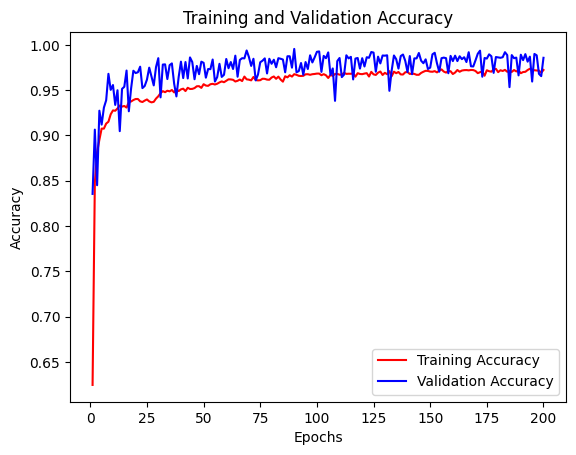

In [ ]:
# Melihat grafik akurasi pelatihan dan validasi
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Save to H5
model.save("/content/Air.h5")

# Convert to tensorflow lite

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
#converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

In [ ]:
tflite_model_file = 'Air.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

###Predict test

In [ ]:
with open("Air.tflite", 'rb') as fid:
    tflite_model = fid.read()
    
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

In [ ]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
input_data = np.array([[78.0,80.0,88.0,53.0]])  # Include values for all 8 input features


In [ ]:
#classification function
def classify_Air_tflite(model_path, data): #model_path:lokasi tflitenya, data = array isinya variabelnya
    # Load the TFLite model
    interpreter = tf.lite.Interpreter(model_path=model_path)
    interpreter.allocate_tensors()

    # Get input and output details
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    #convert data type to float32
    data = data.astype(np.float32)

    # Set the input tensor data
    interpreter.set_tensor(input_details[0]['index'], data)

    # Run inference
    interpreter.invoke()

    # Get the output tensor data
    predictions = interpreter.get_tensor(output_details[0]['index'])

    # Convert predictions to class labels
    predicted_classes = np.argmax(predictions, axis=1)

    return predicted_classes

In [ ]:
model_path = '/content/Air.tflite'
input_data = np.array([[25,25,25,25]])  # Include values for all 4 input features
input_data = input_data.astype(np.float32)
predicted_classes = classify_Air_tflite(model_path, input_data)

print(predicted_classes)

NameError: ignored

In [ ]:
from google.colab import files
files.download("Air.tflite")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#TESTING

In [ ]:
model = tf.keras.models.load_model("/content/Air.h5")

In [ ]:
data_dummy = np.array([[45,42,00,00]])


In [ ]:
np.argmax(model.predict(data_dummy))

1/1 [==============================] - 0s 181ms/step


2

In [ ]:
def anjay(data):
  pred = np.argmax(model.predict(data))

  if pred == 1:
    label  = "Good"
  elif pred == 2:
    label  = "Moderate"
  elif pred == 3:
    label  = "Unhealthy for Sensitive Groups"
  elif pred == 4:
    label  = "Unhealthy"
  elif pred == 5:
    label  = "Very Unhh"
  elif pred == 6:
    label  = "Hazardous"
  
  return label


In [ ]:
anjay(data_dummy)

1/1 [==============================] - 0s 60ms/step


'Moderate'